**Data Visualization**

This Script explores the aegean fakejobs and Hypatia realjobs datasets. The goal is to visualize their characteristics in preparation for analysis


In [2]:
# import needed libraries
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
# load and explore the unrefined aegean500 dataset
df = pd.read_csv(
    "../1_datasets/aegean500_vs_Hypatia500_datasets/aegean500_fakejobs.csv"
)  # noqa: E501

In [5]:
# display all the columns in the dataset
pd.set_option("display.max_columns", None)
df.head(5)

,job_id,title,location,description,benefits,fraudulent
0,99,IC&E Technician,"US, , Stocton, CA","IC&amp;E Technician | Bakersfield, CA Mt. Poso...",BENEFITSWhat is offered:Competitive compensati...,1
1,174,Technician Instrument & Controls,US,Technician Instrument &amp; ControlsLocation D...,"we are a team of almost 8,000 employees who he...",1
2,181,Sales Executive,"PK, SD, Karachi",Sales Executive,Sales Executive,1
3,216,IC&E Technician Mt Poso,"US, CA, Bakersfield, CA / Mt. Poso","IC&amp;E Technician | Bakersfield, CA Mt. Poso...",BENEFITSWhat is offered:Competitive compensati...,1
4,358,Financing Auto(car) sales,"US, IL, hazelcrest",If you have experience in financing for auto s...,profit sharingcar allowancecompany car,1


In [14]:
# print shape of the dataset
print(f"Unrefined Aegean500 Dataset Shape: {df.shape}")

Unrefined Aegean500 Dataset Shape: (500, 6)


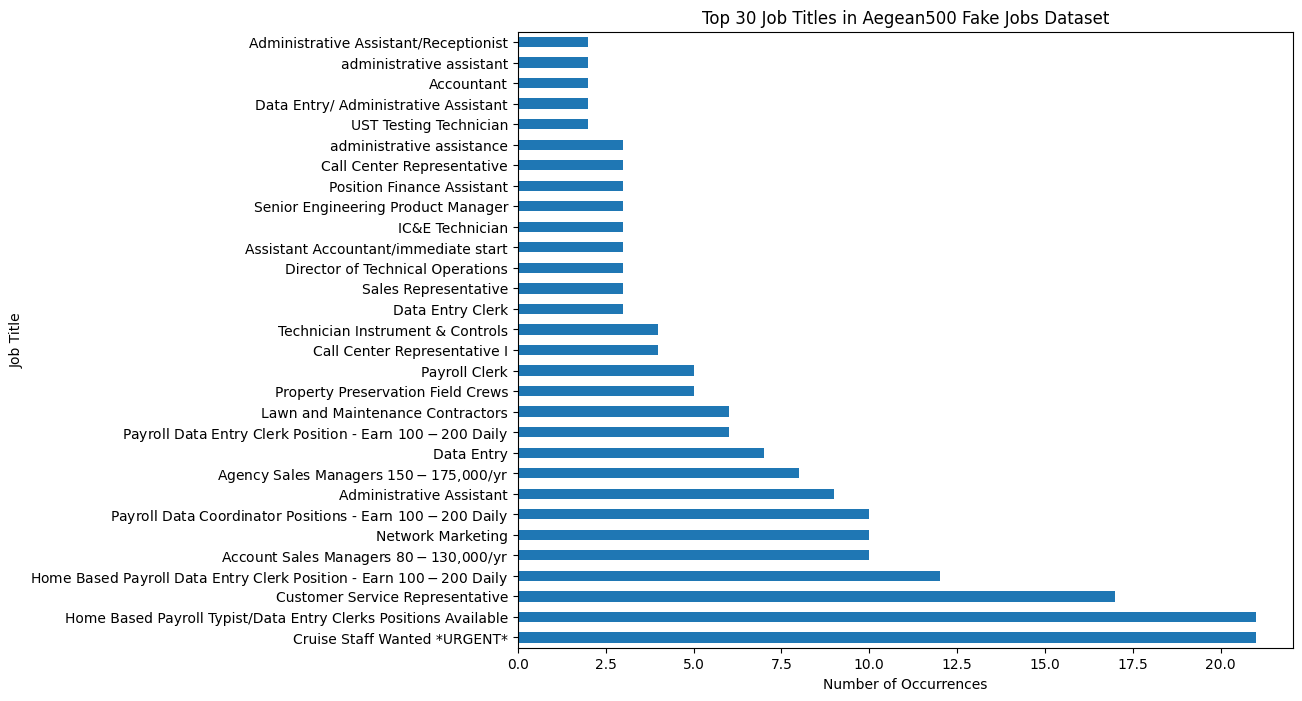

In [15]:
# visualize the top 30 job titles horizontally
df["title"].value_counts().head(30).plot(kind="barh", figsize=(10, 8))
plt.title("Top 30 Job Titles in Aegean500 Fake Jobs Dataset")
plt.xlabel("Number of Occurrences")
plt.ylabel("Job Title")
plt.show()

The result above shows **Customer Service Representative, Data Entry Clerks, and Cruise staff** as some of the topmost jobs listed in the fake jobs dataset.

***A quick note***: It's important to recall that the Aegean dataset conatins jobs from 2012 - 2014. This quickly lets one see that some of these job titles are depreciated or no longer used in modern times, currently 2025. This was taken care of in the prompt sent to the AI refinement where it was specifically told to update the job titles within the job description to reflect modern times. Named Entity Recognition analysis will be performed on the refined descriptions to get a good look at the updated job titles.

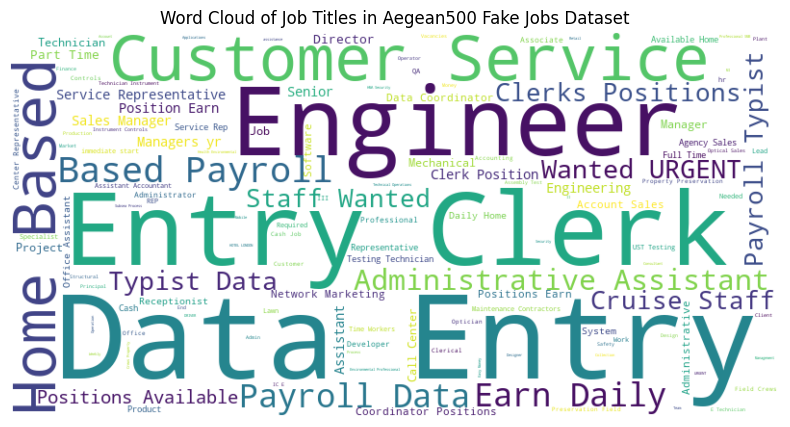

In [ ]:
# generate a word cloud for the job titles
wordcloud = WordCloud(
    width=800, height=400, background_color="white"
).generate(  # noqa: E501
    " ".join(df["title"])
)  # noqa: E501
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title(
    "Word Cloud of Job Titles in the Unrefined Aegean500 Fake Jobs Dataset"
)  # noqa: E501
plt.show()

From the Data above, dominant terms include; Data Entry, Entry clark, Engineer, Customer service, cruise staff, Home Based, While terms like software, developer, director are of lesser dominace.

**This raises an interesting question**: Is this a reflection of the prominent job titles in the era (2012 -2014) or is it an indication that certain job types are more suceptible to scams over others? For example, if there are two fake jobs: one titled "Software Developer" and the other titled "Customer service" both with equally great benefits/compensation packages, which would job seekers gravitate towards?

**Proceeding to explore the refined aegean500**

In [ ]:
# load the refined aegean500 dataset
df_refined = pd.read_csv(
    "../1_datasets/aegean500_vs_Hypatia500_datasets/aegean500_fakejobs_llmrefined.csv"  # noqa: E501
)  # noqa: E501

In [8]:
# display the first few rows of the dataset
df_refined.head(5)

,job_id,title,location,description,benefits,fraudulent,refined_description,refinement_status,refinement_error
0,4184,CUSTOMER SERVICES REP( FULL TIME POSITION),"US, TX, AUSTIN",DescriptionDUTIES INCLUDE BUT ARE NOT LIMITED ...,"Competitive compensation package, benefits and...",1,**Client Engagement Specialist - Service Opera...,Success,NaN
1,4267,Customer Service Representative,"US, FL, Jacksonville",Benefits company looking to hire several Custo...,Weekly PayPaid Holidays,1,**Client Engagement Specialist - Remote**\r\n\...,Success,NaN
2,4316,Senior Mechanical Design Engineer,"US, TX, Houston",Corporate overviewAker Solutions is a global p...,We offer :• Friendly colleagues in an industry...,1,"**Senior Design Project Engineer, Subsea Syste...",Success,NaN
3,4345,Principal Engineer,"US, TX, Houston",Corporate overviewAker Solutions is a global p...,We offer• Friendly colleagues in an industry w...,1,"**Principal Engineer, Strategic Solutions**\r\...",Success,NaN
4,4347,"Discipline Manager Civil, Structural, Marine, ...","US, TX, Houston",Corporate overviewAker Solutions is a global p...,We offer• Friendly colleagues in an industry w...,1,**Aker Solutions: Shaping the Future of Energy...,Success,NaN


We see that the dataset contains similar columns to the unrefined but includes added features of the refinment. Particularly, the refined_description is the LLM refined version of the description.

In [ ]:
# check for duplicates in the job id of the refined dataset
duplicates = df_refined["job_id"].duplicated().sum()
print(f"Number of duplicate job IDs in the refined dataset: {duplicates}")  # noqa: E501

# print the shape of the refined dataset
print(f"Refined Aegean500 Dataset Shape: {df_refined.shape}")

Number of duplicate job IDs in the refined dataset: 0
Refined Aegean500 Dataset Shape: (500, 9)


We see that the dataset contains 500 unique jobs as evidenced by the absence of duplicates in the job id.

In [ ]:
# compare one job id across both datasets to ensure we are dealing
# with same dataset
job_id = 99
print("Unrefined Dataset Job Description:")
print(df[df["job_id"] == job_id]["description"].values[0])
print("\nRefined Dataset Job Description:")
print(df_refined[df_refined["job_id"] == job_id]["description"].values[0])  # noqa: E501

Unrefined Dataset Job Description:
IC&amp;E Technician | Bakersfield, CA Mt. PosoPrincipal Duties and Responsibilities: Calibrates, tests, maintains, troubleshoots, and installs all power plant instrumentation, control systems and electrical equipment.Performs maintenance on motor control centers, motor operated valves, generators, excitation equipment and motors.Performs preventive, predictive and corrective maintenance on equipment, coordinating work with various team members.Designs and installs new equipment and/or system modifications.Troubleshoots and performs maintenance on DC backup power equipment, process controls, programmable logic controls (PLC), and emission monitoring equipment.Uses maintenance reporting system to record time and material use, problem identified and corrected, and further action required; provides complete history of maintenance on equipment.Schedule, coordinate, work with and monitor contractors on specific tasks, as required.Follows safe working practi

Great! the We can see that the two datasets contain same job at job Id 99. So we are safe to proceed to analysis with our refined aegean500

**Proceeding to explore the Hypatia500**

In [ ]:
# load the Hypatia500 dataset
df_hypatia = pd.read_csv(
    "../1_datasets/aegean500_vs_Hypatia500_datasets/Hypatia500_realjobs.csv"
)  # noqa: E501

In [31]:
# display the first few rows of the dataset
df_hypatia.head(5)

,job_id,title,location,description,job_link,source_date
0,501,Junior Process Engineer Technician,"Camarillo, CA 93012",Our client is currently seeking a Junior Proce...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,7/19/2025
1,502,Applications Engineer - Industrial Automation,Michigan,We are seeking talented individuals to join ou...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,7/19/2025
2,503,Process Engineer,"115 Eli Whitney Blvd, Savannah, GA 31408","Together for a cleaner, healthier world.\n \n ...",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,7/19/2025
3,504,PRODUCT ENGINEER,"2600 Skypark Drive, Torrance, CA 90505",LISI AEROSPACE is ranked 60th in the global ae...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,7/19/2025
4,505,Process Engineer,"462 West Kindt Street, Juneau, WI 53039",Bullseye Industries Inc/Serpent Arms has an im...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,7/19/2025


In [32]:
# print the shape of the Hypatia500 dataset
print(f"Hypatia500 Dataset Shape: {df_hypatia.shape}")

Hypatia500 Dataset Shape: (500, 6)


In [ ]:
# check the job id for duplicates in the Hypatia500 dataset
duplicates_hypatia = df_hypatia["job_id"].duplicated().sum()
print(
    f"Number of duplicate job IDs in the Hypatia500 dataset: {duplicates_hypatia}"
)  # noqa: E501

Number of duplicate job IDs in the Hypatia500 dataset: 0


Text(0, 0.5, 'Job Title')

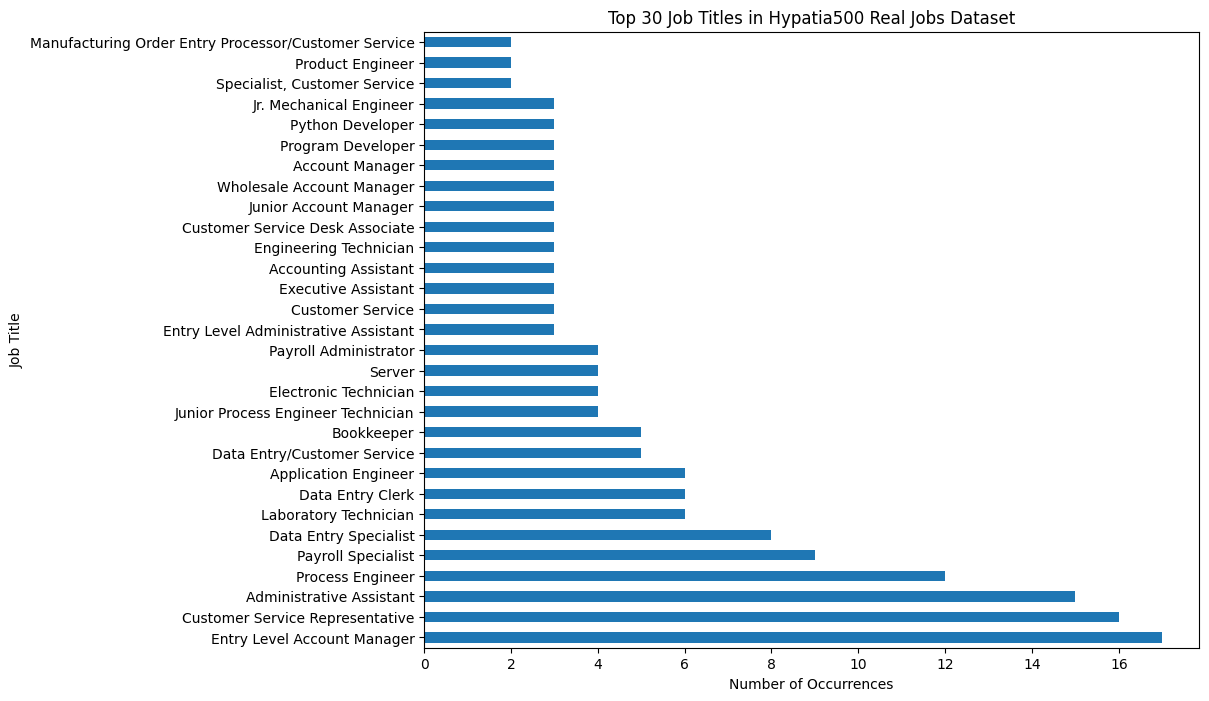

In [34]:
# visualize the top 30 job titles horizontally in the Hypatia500 dataset
df_hypatia["title"].value_counts().head(30).plot(kind="barh", figsize=(10, 8))
plt.title("Top 30 Job Titles in Hypatia500 Real Jobs Dataset")
plt.xlabel("Number of Occurrences")
plt.ylabel("Job Title")

We see that Hypatia500 contains a fair representation of the jobs in the fake jobs dataset. In the plot above, we can see customer service, Data Entry, Payroll, and Engineer Jobs. This gives us the confidence that our analysis of the fake jobs and real jobs will be apples to apples. for example, when we compare the refined_description of a customer service job in the fakejob dataset with that from the real job dataset, we can confidently observe linguistic differences that differentiate scam job posting from real job posting in the era of AI.

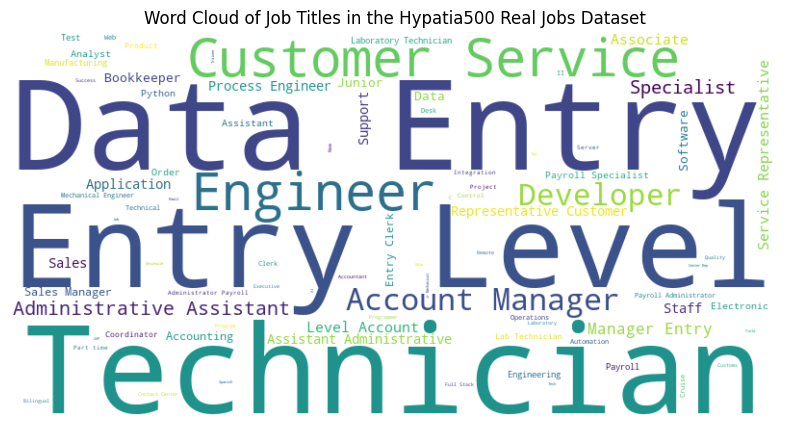

In [ ]:
# display a word cloud for the job titles in the Hypatia500 dataset
wordcloud_hypatia = WordCloud(
    width=800, height=400, background_color="white"
).generate(  # noqa: E501
    " ".join(df_hypatia["title"])
)  # noqa: E501
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_hypatia, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Job Titles in the Hypatia500 Real Jobs Dataset")  # noqa: E501
plt.show()

Notice the similarity between the two word clouds. We are confident that our combined 1000 rows of dataset - aegean500 and hypatia500 - is balanced in terms of jobs represented. We are all set to proceed with deeper analysis. 